## Titanic Data Description

**VARIABLE DESCRIPTIONS:**
* survival        **Survival (0 = No; 1 = Yes)**
* pclass          **Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)**
* name            **Name**
* sex             **Sex**
* age             **Age**
* sibsp           **Number of Siblings/Spouses Aboard**
* parch           **Number of Parents/Children Aboard**
* ticket          **Ticket Number**
* fare            **Passenger Fare**
* cabin           **Cabin** 
* embarked        **Port of Embarkation**
                (C = Cherbourg; Q = Queenstown; S = Southampton)

**SPECIAL NOTES:**

* Pclass is a proxy for socio-economic status (SES)
   * 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

* Age is in Years; Fractional if Age less than One (1)
  * If the Age is Estimated, it is in the form xx.5

**With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.** 

1. *Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic*. 

2. *Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)*.

3. *Parent:   Mother or Father of Passenger Aboard Titanic*.

4. *Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic*. 

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.


In [93]:
%matplotlib inline
from IPython.display import HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import pearsonr
# Description of how the Titanic Sank: 
HTML(
'<iframe width="560" height="315" src="https://www.youtube.com/embed/FSGeskFzE0s"frameborder="0" allowfullscreen></iframe>')

## Data Wrangling for Male and Female Survivors

In [66]:
#inspect the titatic-data set. 
titanic_df = pd.read_csv('titanic-data.csv')
titanic_df.head() 

#filled NaN values with zeror for class 3 passangers. 
titanic_df = titanic_df.fillna(value=0) 

#functions 
def gender_survial(gender,survival):
    """gender must be of type(str) of either gender
       surtival must be of type(int) of either 0 or 1"""
    return titanic_df[((titanic_df['Sex']) == gender) & (titanic_df['Survived'] == survival)]

def passanger_class(data,pclass): 
    """data must be of type(DataFrame) of Titanic DF
       pclass must be of type(int):= [1,2,3]"""
    return data[data['Pclass'] == pclass]

def series(data,column):
    """returns a series of the dataframe with its respective column.
       Column can be of type(str),type(int) and type(float)."""
    return data[column]

#survived male passangers & female passangers
male_survived_df = gender_survial('male',1)
female_survived_df = gender_survial('female',1)

#first class, second class and third class males who survived 
first_class_survived_m = passanger_class(male_survived_df,1)
second_class_survived_m= passanger_class(male_survived_df,2)
third_class_survived_m = passanger_class(male_survived_df,3)

#first class, second class and third class females who survived
first_class_survived_f = passanger_class(female_survived_df,1)
second_class_survived_f= passanger_class(female_survived_df,2)
third_class_survived_f = passanger_class(female_survived_df,3)

#series of first,second and third passanger class survivor male
first_class = series(first_class_survived_m,'Pclass') #f-class series
second_class = series(second_class_survived_m,'Pclass')#s-class series
third_class = series(third_class_survived_m,'Pclass') #t-class series

#series of first,second and third passanger class survivor female
first_class_f = series(first_class_survived_f,'Pclass') #f-class series
second_class_f = series(second_class_survived_f,'Pclass') #s-class series
third_class_f = series(third_class_survived_f,'Pclass') #t-class series


## Histogram of Class Survivors for males.

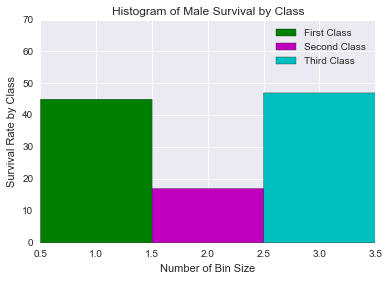

In [67]:
#Plot histogram of first_class 
plt.hist(first_class,
         bins=1,
         color='g',
         label='First Class')

#plot histogram of second_class 
plt.hist(second_class,
         bins=1,
         color='m',
         label='Second Class')

#plot histogram of third_class 
plt.hist(third_class, 
         bins=1,
         label='Third Class',
         color='c')

# Set the x and y boundaries of the figure
plt.ylim([0,70])

# Set the title and labels 
plt.title('Histogram of Male Survival by Class')
plt.xlabel('Number of Bin Size')
plt.ylabel('Survival Rate by Class')
plt.legend(loc='upper right')

plt.show()
# the ship cracks in the middle

## Barplot showing average of male survivors by class

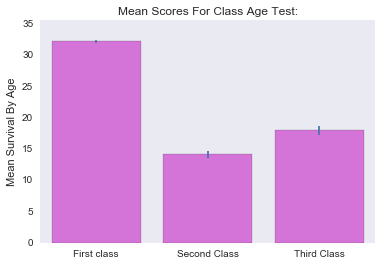

In [68]:
#create a list of the mean scores for each class 
mean_male_class = [first_class_survived_m['Age'].mean(),second_class_survived_m['Age'].mean(),third_class_survived_m['Age'].mean()]

#create a list of variances, which are set at .25 above and below the score
variance = [first_class.mean()*0.25,second_class.mean()*0.25,third_class.mean()*0.25]

#set the bar labels 
bar_labels = ['First class', 'Second Class', 'Third Class']

#create x position of the bars 
x_pos = list(range(len(bar_labels)))

#create the plot bars
#in x position
plt.bar(x_pos, 
       #using the data from teh mean_male_class
       mean_male_class,
       #with a y-error lines set at variance
       yerr=variance,
       #aligned in the center
       align='center',
       #with color
       color='m',
       #alpha 0.5
       alpha=0.5)
# add a grid 
plt.grid() 

# set heigh of the y-axis 
max_y = max(zip(mean_male_class,variance)) # returns a tuple
plt.ylim([0, (max_y[0] + max_y[1]) * 1.1])

# set axes labels and title
plt.ylabel('Mean Survival By Age')
plt.xticks(x_pos, bar_labels)
plt.title('Mean Scores For Class Age Test:')

plt.show()

## Histogram of Female Survivors

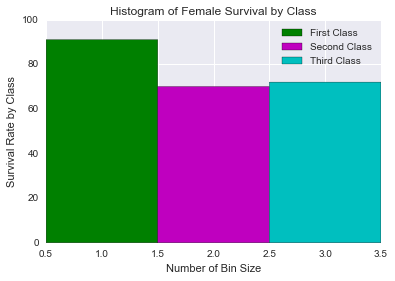

In [7]:
#Plot histogram of first_class 
plt.hist(first_class_f,
         bins=1,
         color='g',
         label='First Class')

#plot histogram of second_class 
plt.hist(second_class_f,
         bins=1,
         color='m',
         label='Second Class')

#plot histogram of third_class 
plt.hist(third_class_f, 
         bins=1,
         label='Third Class',
         color='c')

# Set the x and y boundaries of the figure
plt.ylim([0,100])

# Set the title and labels 
plt.title('Histogram of Female Survival by Class')
plt.xlabel('Number of Bin Size')
plt.ylabel('Survival Rate by Class')
plt.legend(loc='upper right')

plt.show()
# the ship cracks in the middle

## Barplot showing average age of female survival by class

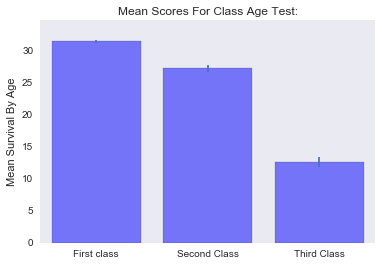

In [69]:
#create a list of the mean scores for each class 
mean_female_class = [first_class_survived_f['Age'].mean(),second_class_survived_f['Age'].mean(),
                     third_class_survived_f['Age'].mean()]

#create a list of variances, which are set at .25 above and below the score
variance = [first_class_f.mean()*0.25,second_class_f.mean()*0.25,third_class_f.mean()*0.25]

#set the bar labels 
bar_labels = ['First class', 'Second Class', 'Third Class']

#create x position of the bars 
x_pos = list(range(len(bar_labels)))

#create the plot bars
#in x position
plt.bar(x_pos, 
       #using the data from teh mean_female_class
       mean_female_class,
       #with a y-error lines set at variance
       yerr=variance,
       #aligned in the center
       align='center',
       #with color
       color='b',
       #alpha 0.5
       alpha=0.5)
# add a grid 
plt.grid() 

# set heigh of the y-axis 
max_y = max(zip(mean_female_class,variance)) # returns a tuple
plt.ylim([0, (max_y[0] + max_y[1]) * 1.1])

# set axes labels and title
plt.ylabel('Mean Survival By Age')
plt.xticks(x_pos, bar_labels)
plt.title('Mean Scores For Class Age Test:')

plt.show()

## Data Wrangling for Male and Female Deaths. 

In [76]:
#deaths of male and female passangers
male_deaths = gender_survial('male',0)
female_deaths = gender_survial('female',0)

#first class,second and third males who died
first_class_death_m = passanger_class(male_deaths,1)
second_class_death_m = passanger_class(male_deaths,2)
third_class_death_m = passanger_class(male_deaths,3)

#first class,second and third females who died
first_class_death_f = passanger_class(female_deaths,1)
second_class_death_f= passanger_class(female_deaths,2)
third_class_death_f = passanger_class(female_deaths,3)

#series of first,second and thrid class male deaths
first_class_death_males  = series(first_class_death_m,'Pclass') #f-class series
second_class_death_males = series(second_class_death_m,'Pclass')#s-class series
third_class_death_males  = series(third_class_death_m,'Pclass') #t-class series

#series of first,second and third passanger class female deaths
first_class_death_females  = series(first_class_death_f,'Pclass') #f-class series
second_class_death_females = series(second_class_death_f,'Pclass')#s-class series
third_class_death_females  = series(third_class_death_f,'Pclass') #t-class series

## Histogram of class deaths for males

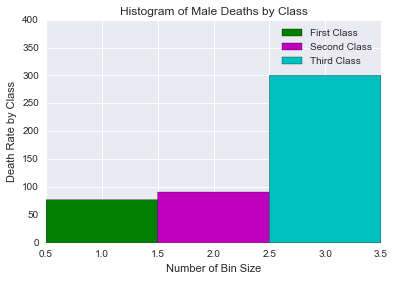

In [83]:
#Plot histogram of first_class_death_males
plt.hist(first_class_death_males,
         bins=1,
         color='g',
         label='First Class')

#plot histogram of second_class_death_males 
plt.hist(second_class_death_males,
         bins=1,
         color='m',
         label='Second Class')

#plot histogram of third_class_death_males
plt.hist(third_class_death_males, 
         bins=1,
         label='Third Class',
         color='c')

# Set the x and y boundaries of the figure
plt.ylim([0,400])

# Set the title and labels 
plt.title('Histogram of Male Deaths by Class')
plt.xlabel('Number of Bin Size')
plt.ylabel('Death Rate by Class')
plt.legend(loc='upper right')

plt.show()
# the ship cracks in the middle

## BarPlot of Mean Age Death for Class Males

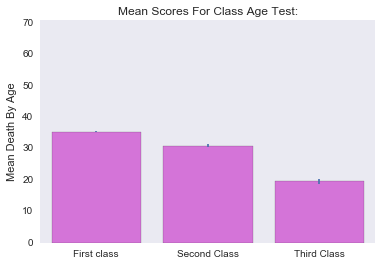

In [92]:
#create a list of the mean scores for each class 
mean_male_death_class = [first_class_death_m['Age'].mean(),second_class_death_m['Age'].mean(),third_class_death_m['Age'].mean()]

#create a list of variances, which are set at .25 above and below the score
variance = [first_class_death_males.mean()*0.25,second_class_death_males.mean()*0.25,third_class_death_males.mean()*0.25]

#set the bar labels 
bar_labels = ['First class', 'Second Class', 'Third Class']

#create x position of the bars 
x_pos = list(range(len(bar_labels)))

#create the plot bars
#in x position
plt.bar(x_pos, 
       #using the data from teh mean_male_class
       mean_male_death_class,
       #with a y-error lines set at variance
       yerr=variance,
       #aligned in the center
       align='center',
       #with color
       color='m',
       #alpha 0.5
       alpha=0.5)
# add a grid 
plt.grid() 

# set heigh of the y-axis 
max_y = max(zip(mean_male_class,variance)) # returns a tuple
plt.ylim([0, (max_y[0] + max_y[0]) * 1.1])

# set axes labels and title
plt.ylabel('Mean Death By Age')
plt.xticks(x_pos, bar_labels)
plt.title('Mean Scores For Class Age Test:')

plt.show()

## Histogram of class deaths for females

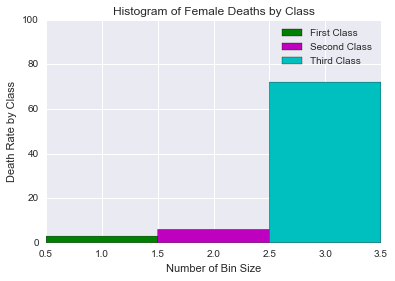

In [86]:
#Plot histogram of first_class_death_males
plt.hist(first_class_death_females,
         bins=1,
         color='g',
         label='First Class')

#plot histogram of second_class_death_males 
plt.hist(second_class_death_females,
         bins=1,
         color='m',
         label='Second Class')

#plot histogram of third_class_death_males
plt.hist(third_class_death_females, 
         bins=1,
         label='Third Class',
         color='c')

# Set the x and y boundaries of the figure
plt.ylim([0,100])

# Set the title and labels 
plt.title('Histogram of Female Deaths by Class')
plt.xlabel('Number of Bin Size')
plt.ylabel('Death Rate by Class')
plt.legend(loc='upper right')

plt.show()
# the ship cracks in the middle

## BarPlot of Mean Age Death for Class Females

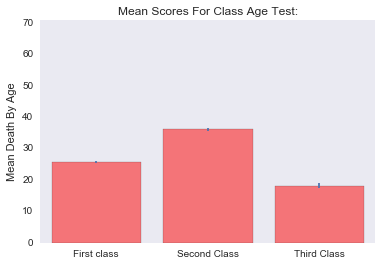

In [91]:
#create a list of the mean scores for each class 
mean_female_death_class = [first_class_death_f['Age'].mean(),second_class_death_f['Age'].mean(),third_class_death_f['Age'].mean()]

#create a list of variances, which are set at .25 above and below the score
variance = [first_class_death_females.mean()*0.25,second_class_death_females.mean()*0.25,third_class_death_females.mean()*0.25]

#set the bar labels 
bar_labels = ['First class', 'Second Class', 'Third Class']

#create x position of the bars 
x_pos = list(range(len(bar_labels)))

#create the plot bars
#in x position
plt.bar(x_pos, 
       #using the data from teh mean_male_class
       mean_female_death_class,
       #with a y-error lines set at variance
       yerr=variance,
       #aligned in the center
       align='center',
       #with color
       color='r',
       #alpha 0.5
       alpha=0.5)
# add a grid 
plt.grid() 

# set heigh of the y-axis 
max_y = max(zip(mean_male_class,variance)) # returns a tuple
plt.ylim([0, (max_y[0] + max_y[0]) * 1.1])

# set axes labels and title
plt.ylabel('Mean Death By Age')
plt.xticks(x_pos, bar_labels)
plt.title('Mean Scores For Class Age Test:')

plt.show()

## Data Wrangling for embarked survivors

In [37]:
#Survivors that embarked at (C = Cherbourg; Q = Queenstown; S = Southampton)
#Try to do some correlation between survivors and where they embarked
embarked_cdf = titanic_df[(titanic_df['Survived'] == 1) & (titanic_df['Embarked'] == 'C')]
embarked_sdf = titanic_df[(titanic_df['Survived'] == 1) & (titanic_df['Embarked'] == 'S')]
embarked_qdf = titanic_df[(titanic_df['Survived'] == 1) & (titanic_df['Embarked'] == 'Q')]

## Scatter plot of Fare of embarked survivors

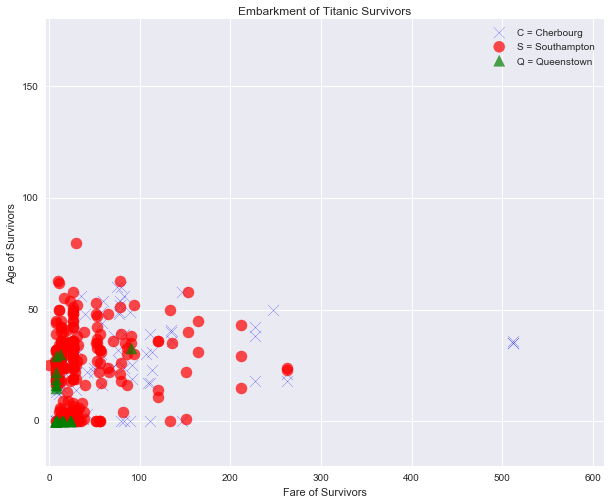

In [70]:
#Create a figure 
plt.figure(figsize=(10,8))

#Create a scatter plot of where survivors embarked:

            # C embarked as the x axis 
plt.scatter(embarked_cdf['Fare'], 
            # as the y axis
            embarked_cdf['Age'], 
            # the marker as,
            marker = 'x',
            # the color 
            color = 'b',
            # the alpha 
            alpha = 0.7, 
            # with size
            s = 124, 
            # labelled this
            label = 'C = Cherbourg') 

            # S embarked as the x axis
plt.scatter(embarked_sdf['Fare'], 
            # as the y axis
            embarked_sdf['Age'], 
            # the marker as,
            marker = 'o',
            # the color 
            color = 'r',
            # the alpha 
            alpha = 0.7, 
            # with size
            s = 124, 
            # labelled this
            label = 'S = Southampton') 

            # Q embarked as the x axis
plt.scatter(embarked_qdf['Fare'], 
            # as the y axis
            embarked_qdf['Age'], 
            # the marker as,
            marker = '^',
            # the color 
            color = 'g',
            # the alpha 
            alpha = 0.7, 
            # with size
            s = 124, 
            # labelled this
            label = 'Q = Queenstown')

#Chart title 
plt.title('Embarkment of Titanic Survivors')

#y label
plt.ylabel('Age of Survivors')

#x label 
plt.xlabel('Fare of Survivors')

#and a legend 
plt.legend(loc='upper right')

# set the figure boundaries
plt.xlim([min(embarked_qdf['Fare'])-11,max(embarked_cdf['Fare']) + 100])
plt.ylim([min(embarked_qdf['Age'])-20, max(embardked_sdf['Age'])+100])
plt.show()





In [125]:
titanic_df[(titanic_df['Parch'] > 0) & (titanic_df['Pclass'] == 3)]['Survived'] == 1

7      False
8       True
10      True
13     False
16     False
24     False
25      True
50     False
59     False
63     False
65      True
68      True
71     False
86     False
93     False
119    False
128     True
140    False
147    False
153    False
159    False
160    False
164    False
165     True
167    False
171    False
172     True
175    False
176    False
180    False
       ...  
644     True
657    False
678    False
683    False
686    False
691     True
702    False
709     True
736    False
746    False
751     True
783    False
787    False
788     True
792    False
799    False
803     True
813    False
819    False
823     True
824    False
846    False
850    False
852    False
855     True
858     True
863    False
869     True
885    False
888    False
Name: Survived, dtype: bool

SyntaxError: invalid syntax (<ipython-input-126-1d5b7770eb14>, line 1)